# MiniProject 2

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import NMF
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import PredefinedKFold, GridSearchCV

In [0]:
!pip install surprise

Clean up the data with Pandas

In [43]:
data = pd.read_csv('./data.txt', delimiter="\t", header=None)
data.columns = ('user', 'item', 'rating')
train = pd.read_csv('./train.txt', delimiter="\t", header=None)
train.columns = ('user', 'item', 'rating')
test = pd.read_csv('./test.txt', delimiter="\t", header=None)
test.columns = ('user', 'item', 'rating')
dropped = []
for i in range(data['item'].max()):
    if (i + 1) not in train['item'].values:
        dropped.append(i)
for index in dropped:
    test = test.drop(data.index[index])
test

,user,item,rating
0,707,766,3
1,943,188,4
2,772,313,5
3,828,26,3
4,854,514,4
...,...,...,...
9995,13,858,1
9996,7,79,4
9997,588,1058,2
9998,916,727,4


Optimize parameters for Surprise SVD

MSE: 0.8843
MSE: 0.8840
MSE: 0.8840
MSE: 0.8829
MSE: 0.8852
MSE: 0.8869
MSE: 0.8854
MSE: 0.8850
MSE: 0.8844
MSE: 0.8845
MSE: 0.8855
MSE: 0.8880
MSE: 0.8839
MSE: 0.8837
MSE: 0.8856
MSE: 0.8849
MSE: 0.8856
MSE: 0.8870


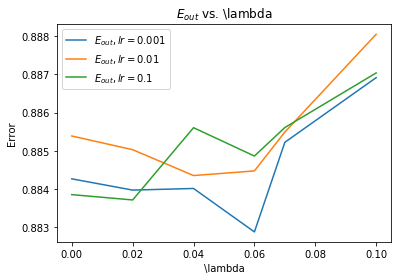

In [38]:
K = 20
n_epochs = 50
lrs = [0.001, 0.01, 0.1]
regs = [0.0, 0.02, 0.04, 0.06, 0.07, 0.1]
E_outs = [[], [], [], []]

# Load train and test sets from dataframe
reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(train[['user', 'item', 'rating']], reader).build_full_trainset()
test_data = Dataset.load_from_df(test[['user', 'item', 'rating']], reader).build_full_trainset().build_testset()

# Fit and score data
for i in range(len(lrs)):
    for reg in regs:
        algo = SVD(n_factors=K, n_epochs=n_epochs, lr_all=lr, reg_all=reg)
        algo.fit(train_data)
        predictions = algo.test(test_data)
        # U = algo.pu
        # V = algo.qi
        # print(U.shape)
        # print(V.shape)
        E_outs[i].append(float(accuracy.mse(predictions)))
  
# Plot values of E_out across lambda for each value of lr
for i in range(len(lrs)):
    plt.plot(regs, E_outs[i], label='$E_{out}, lr=$'+str(lrs[i]))
plt.title('$E_{out}$ vs. \lambda')
plt.xlabel('\lambda')
plt.ylabel('Error')
plt.legend()	
plt.savefig('2mini_eout.png')		

Use Surprise SVD to estimate U and V 

In [57]:
K = 20
n_epochs = 50
lr = 0.001
reg = 0.06

# Load train and test sets from dataframe
reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(data[['user', 'item', 'rating']], reader).build_full_trainset()

# Fit the data to obtain U and V
algo = SVD(n_factors=K, n_epochs=n_epochs, lr_all=lr, reg_all=reg)
algo.fit(train_data)
U = np.transpose(algo.pu)
V = np.transpose(algo.qi)

print(U.shape)
print(V.shape)

(20, 943)
(20, 1682)


Use np.linalg.SVD to decompose V and project U and V into 2-D space

In [62]:
A, S, B = np.linalg.svd(V)

U_proj = np.matmul(np.transpose(A[:,:2]), U)
V_proj = np.matmul(np.transpose(A[:,:2]), V)

print(V_proj)

[[-0.1306871   0.05539973  0.05833426 ... -0.05046679  0.01928438
  -0.11930413]
 [ 0.17255596  0.03338293 -0.03843089 ... -0.09933857 -0.01022579
  -0.05105668]]


Output V_proj as a csv to visualize

In [0]:
output = pd.DataFrame({'Column1': V_proj[0,:], 'Column2': V_proj[1,:]})
output
output.to_csv('surprise.csv', index=False)